# Two Qubit Design

## Coupled Tee Construction

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
#This imports the necessary path to draw the single pad transmon design. 
import sys
sys.path.append('../../resources')
from single_pad_transmon_pocket import TransmonPocket_Single

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [7]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround

from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee

import pyEPR as epr

In [4]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '10 mm'
design.chips.main.size['size_y'] = '10 mm'

design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

gui = MetalGUI(design)

In [60]:
design.delete_all_components()

In [154]:
design.delete_component('cpw_2')

False

In [163]:
design.overwrite_enabled = True #This makes it possible to edit the designs later on. 



options = dict(pad_width = '250 um',
pocket_width = '300 um',
pad_pocket_distance_top = '60 um',
connection_pads = dict(
    a = dict(loc_W  = 1, 
             loc_H =  1, 
             pad_gap = '10 um',
             pad_height = '20 um',
             pad_width = '100 um',
             pad_cpw_extent =  '10 um',
             pocket_rise = '0 um',
             cpw_extend = '5 um')))

q1 = TransmonPocket_Single(design,'Q1',options = dict(pos_x = '1 mm', 
                                                      pos_y = '0',
                                                      pad_height = '200 um', 
                                                      **options))
q2 = TransmonPocket_Single(design,'Q2',options = dict(pos_x = '0.39 mm', 
                                                      pos_y = '-0.7', 
                                                      pad_height = '220 um', 
                                                      **options))

gui.rebuild()
gui.zoom_on_components(['Q1','Q2'])

02:44PM 20s WARNING [check_lengths]: For path table, component=cpw_2, key=trace has short segments that could cause issues with fillet. Values in (8-9)  are index(es) in shapely geometry.
02:44PM 20s WARNING [check_lengths]: For path table, component=cpw_2, key=cut has short segments that could cause issues with fillet. Values in (8-9)  are index(es) in shapely geometry.


In [63]:
design.variables['cpw_width']

'15 um'

In [125]:
design.parse_value(q1.options.pos_x)

1

In [170]:
# design.delete_all_components()

# prime_width='10um',
#                            prime_gap='6um',
#                            second_width='10um',
#                            second_gap='6um',
#                            coupling_space='3um',
#                            coupling_length='100um',
#                            down_length='100um',
#                            fillet='25um',
#                            mirror=False,
#                            open_termination=True)

TQ_options = dict(prime_width = design.variables['cpw_width'],
               prime_gap = design.variables['cpw_gap'],
               second_width = design.variables['cpw_width'],
               second_gap = design.variables['cpw_gap'],
               downlength = '30um',
               coupling_space = '-5um',
               open_termination=False)

TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='1.35 mm',
                                             pos_y='0.5 mm',
                                             coupling_length='200 um', **TQ_options))
TQ2 = CoupledLineTee(design, 'TQ2', options=dict(pos_x='0.19 mm',
                                             pos_y='0.5 mm',
                                             coupling_length='200 um', mirror = True, **TQ_options))

gui.rebuild()
gui.autoscale()

In [127]:
import numpy as np
from collections import OrderedDict

def pins_for_spiral(radius,gap,n,dis = ('0','0'),no_last = False):
    spiral_list = OrderedDict()
    radius = design.parse_value(radius)
    gap = design.parse_value(gap)
    x = design.parse_value(dis[0])
    y = design.parse_value(dis[1])
    for step in range(n):
        point_value = radius / 2 + step * (0 + gap)
        spiral_list[step*4] = np.array([x+point_value, y-point_value])
        spiral_list[step*4+1] = np.array([x-point_value, y-point_value])
        spiral_list[step*4+2] = np.array([x-point_value, y+point_value])
        if no_last & (step==n-1):
            # spiral_list[step*4+3] = np.array([x+point_value + (0 + gap), y+point_value])
            break
        spiral_list[step*4+3] = np.array([x+point_value + (0 + gap), y+point_value])

    point_value = radius / 2 + (step + 1) * (0 + gap)
    # spiral_list[step*4+4] = np.array([-point_value, -point_value])
    return(spiral_list)

In [164]:
anchors_1 = pins_for_spiral('0.4 mm','0.1 mm',2,dis = (q1.options.pos_x,q1.options.pos_y))
anchors_2 = pins_for_spiral('0.4 mm','0.1 mm',2,dis = (q2.options.pos_x,q2.options.pos_y),no_last=True)
print(anchors_1)
print(anchors_2)

OrderedDict([(0, array([ 1.2, -0.2])), (1, array([ 0.8, -0.2])), (2, array([0.8, 0.2])), (3, array([1.3, 0.2])), (4, array([ 1.3, -0.3])), (5, array([ 0.7, -0.3])), (6, array([0.7, 0.3])), (7, array([1.4, 0.3]))])
OrderedDict([(0, array([ 0.59, -0.9 ])), (1, array([ 0.19, -0.9 ])), (2, array([ 0.19, -0.5 ])), (3, array([ 0.69, -0.5 ])), (4, array([ 0.69, -1.  ])), (5, array([ 0.09, -1.  ])), (6, array([ 0.09, -0.4 ]))])


In [165]:
options_1 = Dict(total_length='4 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='20 um',
        lead = dict(start_straight='20 um', end_straight = '0 um'),
        anchors = anchors_1,
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end')), )

options_2 = Dict(total_length='3.5 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='20 um',
        lead = dict(start_straight='20 um', end_straight = '0 um'),
        anchors = anchors_2,
        pin_inputs=Dict(
            start_pin=Dict(component='Q2', pin='a'),
            end_pin=Dict(component='TQ2', pin='second_end')), )

In [166]:
CPW1 = RouteMixed(design, 'cpw_1', options_1)
CPW2 = RouteMixed(design, 'cpw_2', options_2)



gui.rebuild()
gui.autoscale()

In [134]:
ops_mid = Dict(hfss_wire_bonds = True,
               pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='TQ2',
                     pin='prime_end')))

cpw_middle = RouteStraight(design, 'cpw_middle', options=ops_mid)

gui.rebuild()
gui.autoscale()

## Simulations

### EPR Analysis

In [171]:
import numpy as np
from qiskit_metal.analyses.quantization import EPRanalysis

In [183]:
hfss.clean_active_design()

INFO 03:19PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:19PM [load_ansys_project]: 	Opened Ansys App
INFO 03:19PM [load_ansys_project]: 	Opened Ansys Desktop v2022.2.0
INFO 03:19PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/slab/Documents/Ansoft/
	Project:   Project10
INFO 03:19PM [connect_design]: 	Opened active design
	Design:    readout [Solution type: Eigenmode]
INFO 03:19PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:19PM [connect]: 	Connected to project "Project10" and design "readout" 😀 

INFO 03:19PM [connect_design]: 	Opened active design
	Design:    readout [Solution type: Eigenmode]


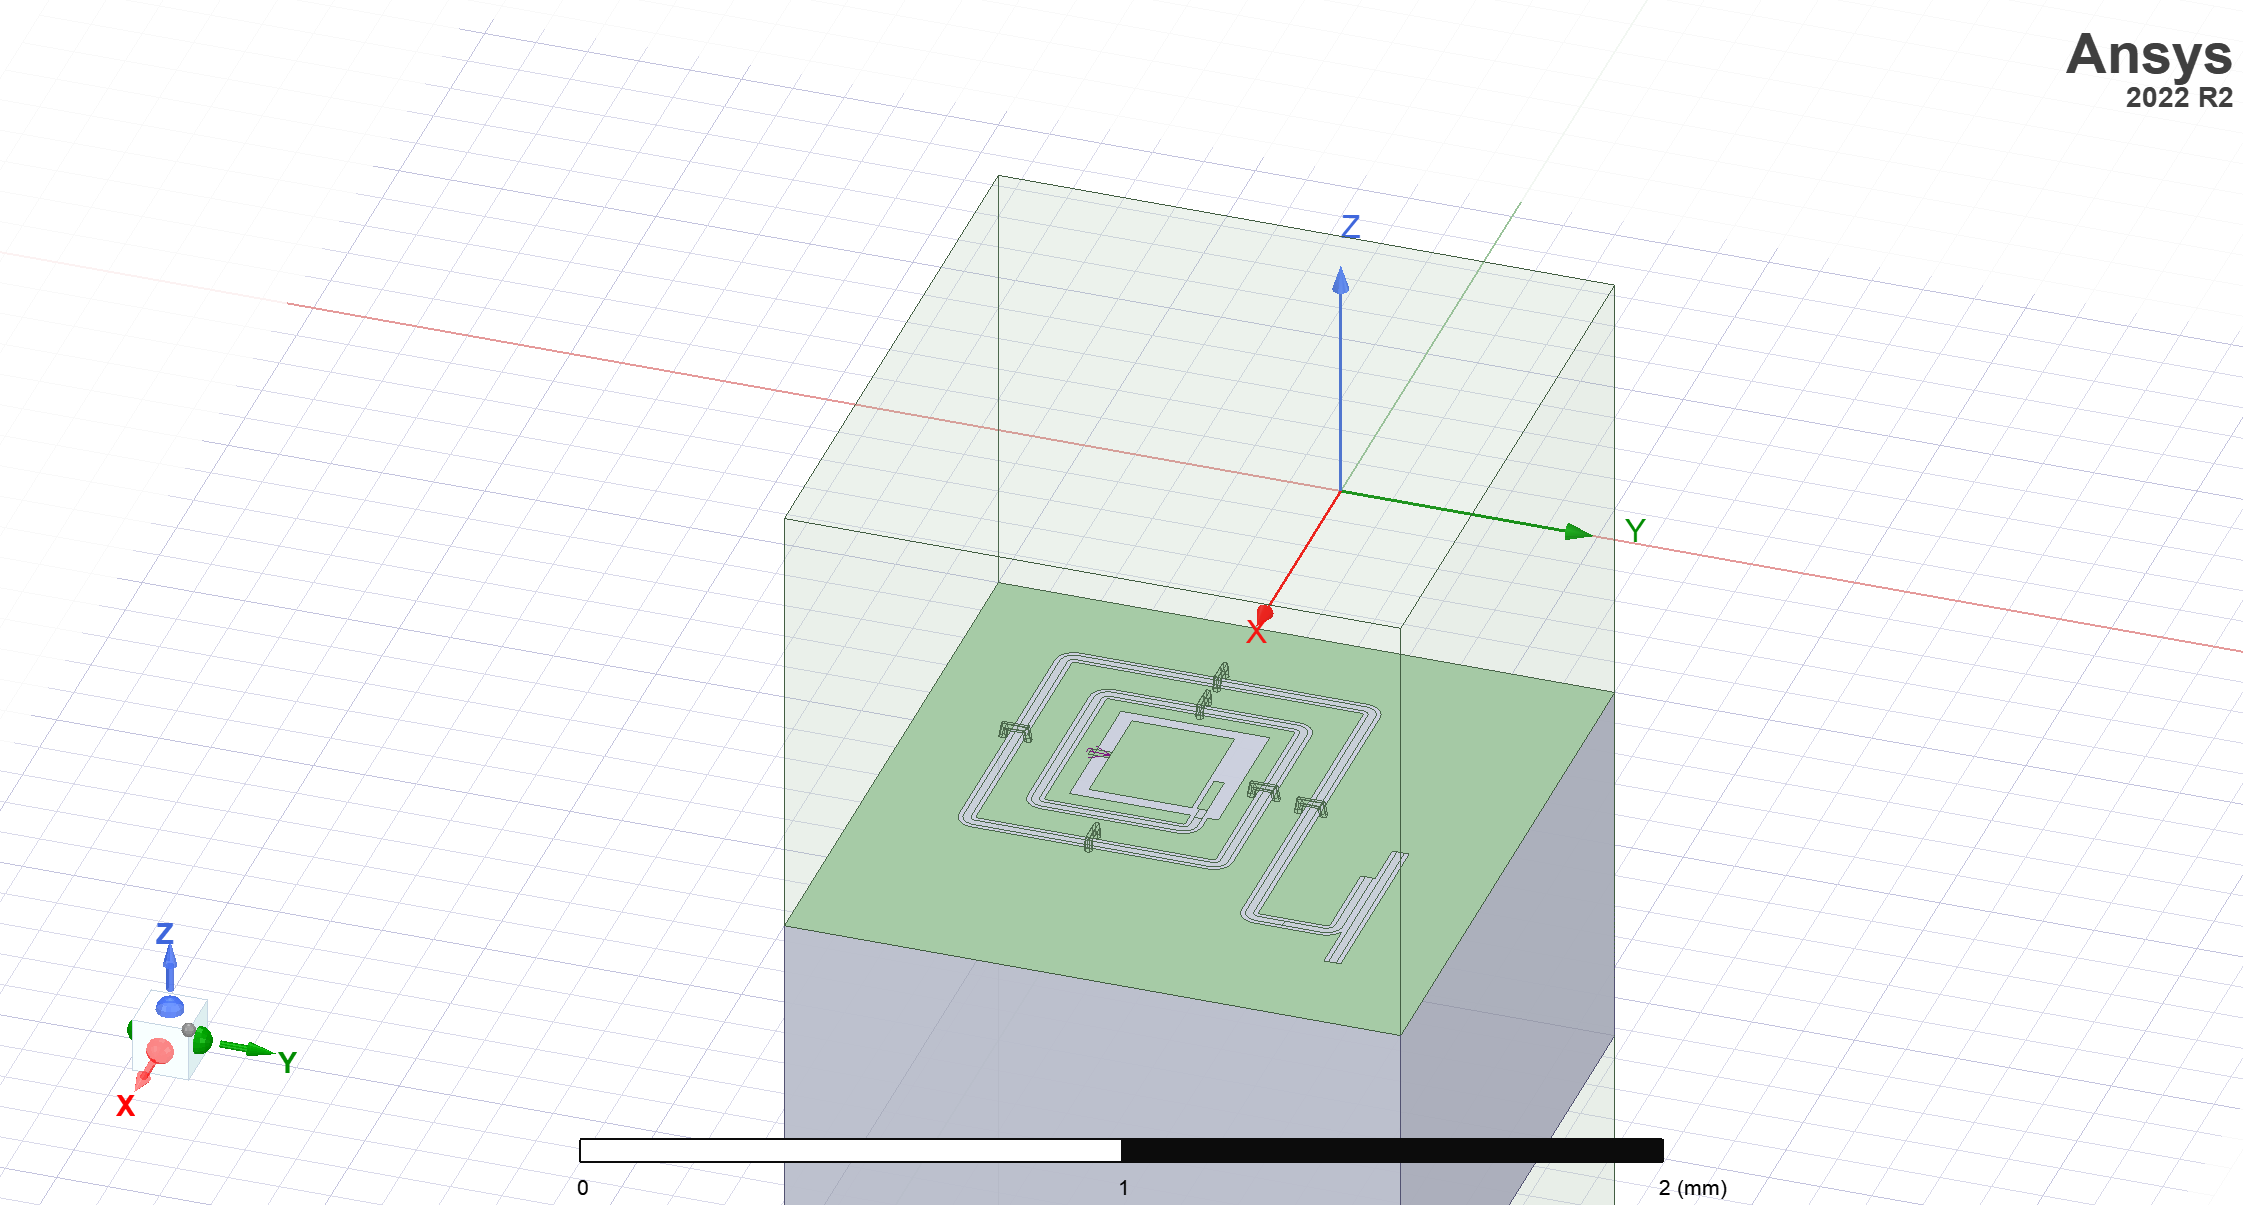

INFO 03:19PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 3
Number of simulation passes              = 40
Convergence freq max delta percent diff  = 0.1



In [184]:
eig_res = EPRanalysis(design, "hfss")

hfss = eig_res.sim.renderer
hfss.start()

hfss.activate_ansys_design('readout','eigenmode')

hfss.render_design(['cpw_1','Q1','TQ1'],[])
hfss.save_screenshot()

setup = hfss.pinfo.setup
setup.passes = 40
setup.min_converged = 5
setup.n_modes = 3

print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss.pinfo.design.set_variable('Lj', '10 nH')
hfss.pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

In [185]:
eig_res.get_frequencies()

Design "readout" info:
	# eigenmodes    3
	# variations    1
Design "readout" info:
	# eigenmodes    3
	# variations    1


Freq. (GHz)  Quality Factor
variation mode                             
0         0        6.208280             inf
          1        6.792545             inf
          2       19.477351             inf

In [186]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
eig_res.sim.plot_convergences()

03:31PM 44s INFO [get_f_convergence]: Saved convergences to c:\Users\slab\Desktop\Qiskit_metal_tutorial\tutorials\4 Analysis\A. Core - EM and quantization\hfss_eig_f_convergence.csv
INFO 03:31PM [__del__]: Disconnected from Ansys HFSS
INFO 03:31PM [__del__]: Disconnected from Ansys HFSS
INFO 03:31PM [__del__]: Disconnected from Ansys HFSS


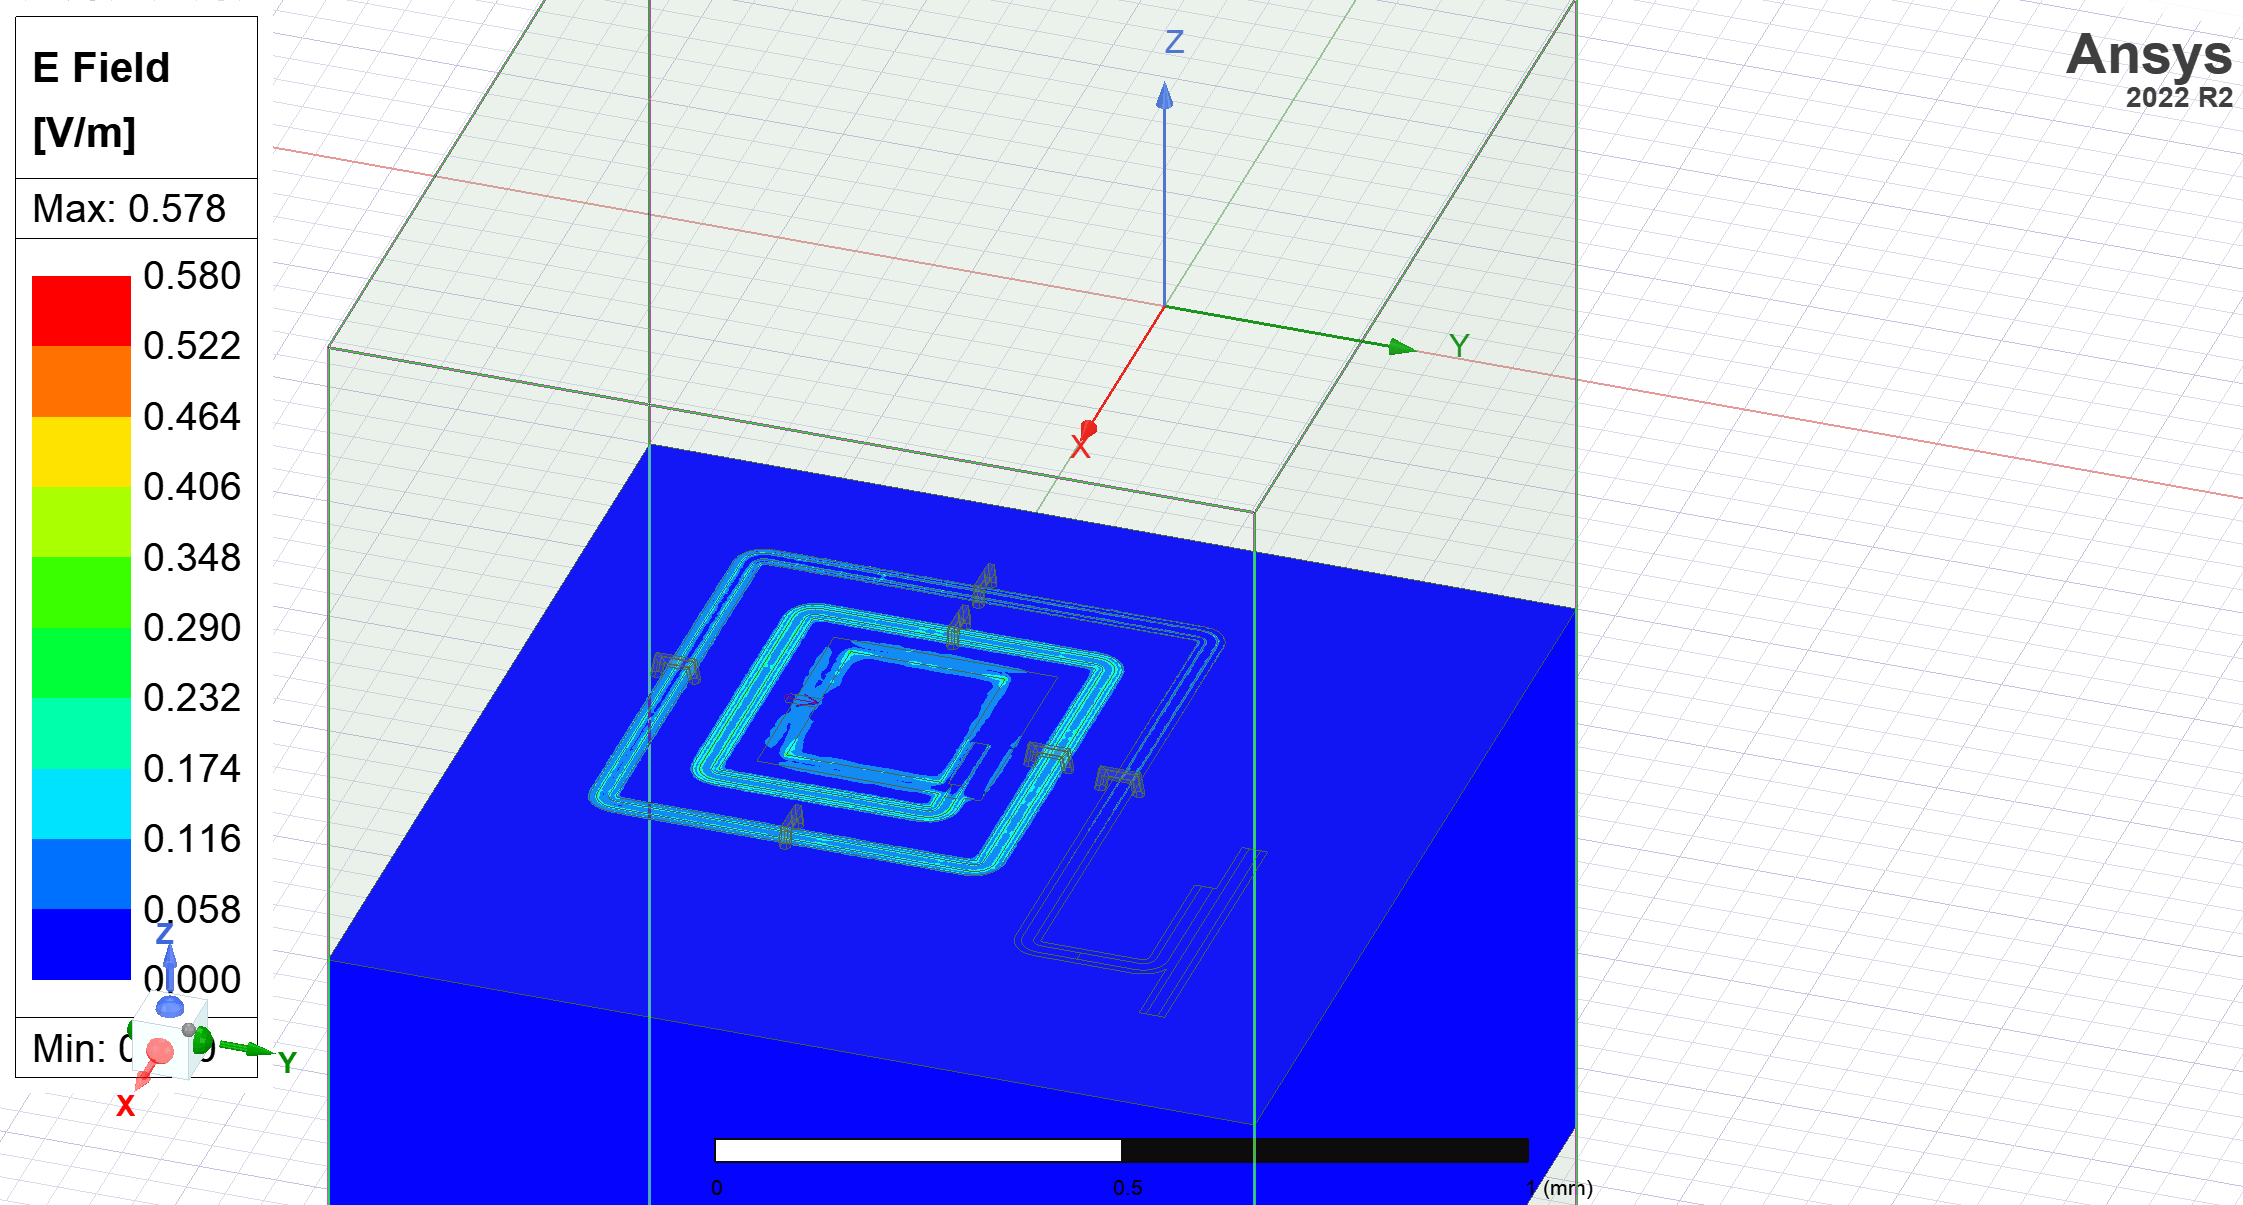

WindowsPath('c:/Users/slab/Desktop/Qiskit_metal_tutorial/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [193]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()


In [194]:
hfss.clear_fields(['Mag_E1'])

In [195]:
hfss.set_mode(2, "Setup")

INFO 03:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


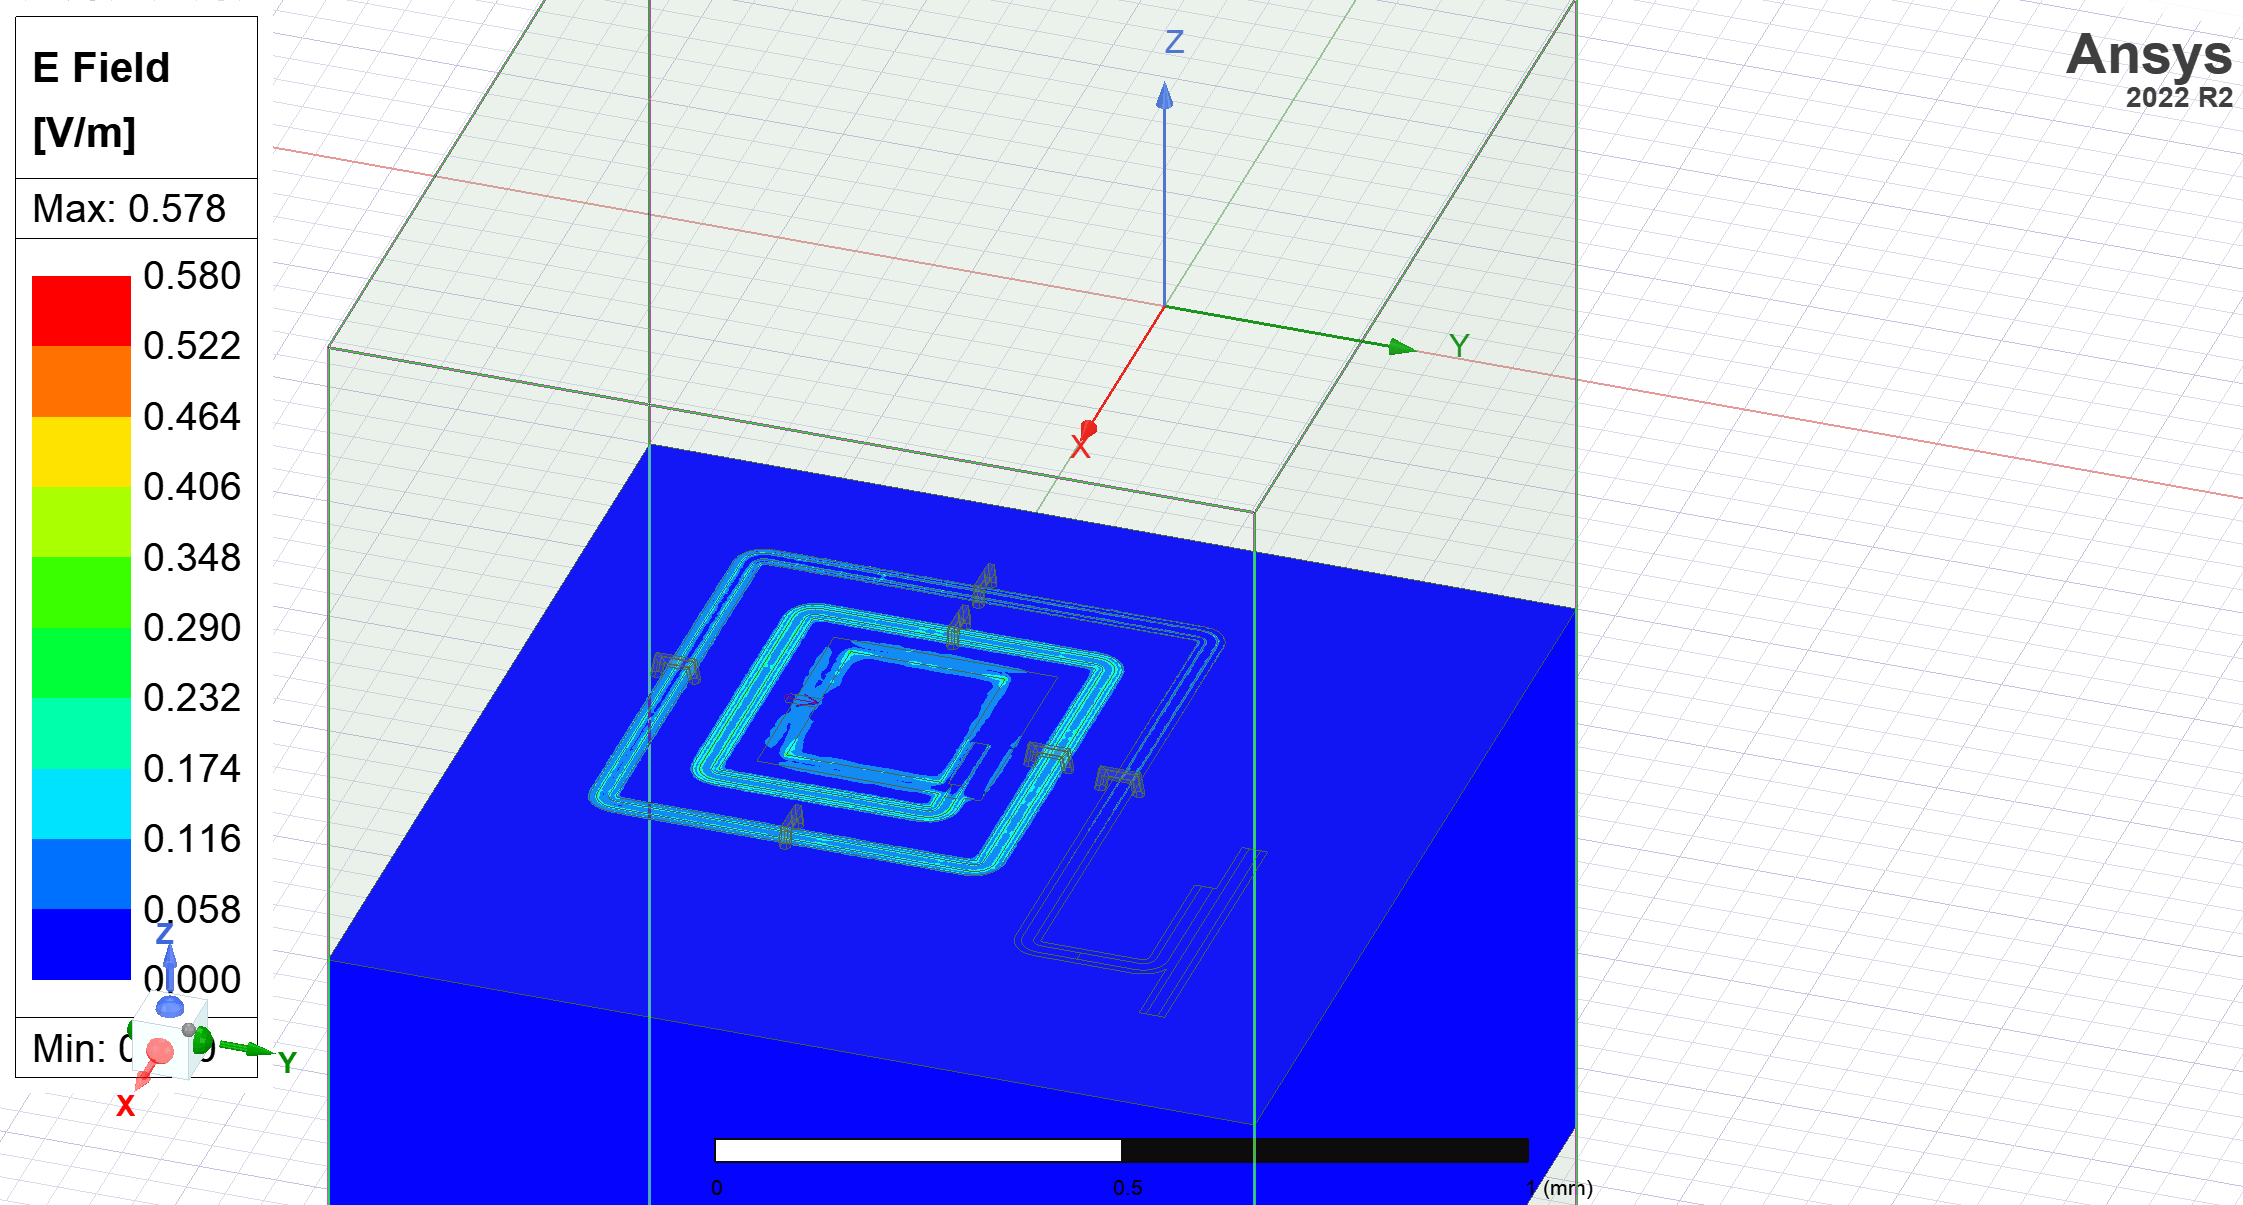

WindowsPath('c:/Users/slab/Desktop/Qiskit_metal_tutorial/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [196]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [197]:
hfss.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


True

In [198]:
gui.main_window.close()


True